In [26]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

In [2]:
dataset = pd.read_csv('online_shoppers_intention.csv')
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
lb = LabelEncoder()
dataset['Month'] = lb.fit_transform(dataset['Month'])
dataset.dropna(inplace=True)
print(dataset['Month'])

0        2
1        2
2        2
3        2
4        2
        ..
12325    1
12326    7
12327    7
12328    7
12329    7
Name: Month, Length: 12316, dtype: int32


In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
le = LabelEncoder()
X[:, 16] = le.fit_transform(X[:, 16])
print(X[:,16])

[0 0 0 ... 1 0 1]


In [6]:
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 ... 0 0 0]


In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [15])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X[:,15])

[1 2 1 ... 2 2 2]


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
import keras
from keras.models import Sequential #used to initialize the NN
from keras.layers import Dense  #used to build the hidden Layers
from keras.layers import Dropout

In [11]:
np.shape(X_train)

(9852, 19)

In [12]:
#Criando as camadas de ann
ann = tf.keras.models.Sequential()

In [13]:
ann.add(tf.keras.layers.Dense(units=8, activation='selu'))
ann.add(tf.keras.layers.Dense(units=8, activation='selu'))

In [14]:
ann.add(tf.keras.layers.Dense(units=8, activation='selu'))
ann.add(tf.keras.layers.Dense(units=8, activation='selu'))

In [15]:
ann.add(tf.keras.layers.Dense(units=8, activation='selu'))
ann.add(tf.keras.layers.Dense(units=8, activation='selu'))

In [16]:
ann.add(tf.keras.layers.Dense(units=8, activation='selu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [17]:
ann.compile(optimizer = 'adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
#Printando o x e o y de treino
y_train
X_train

array([[-0.39813772, -0.0833674 ,  0.40969753, ...,  0.76835374,
        -0.76362179,  1.80029653],
       [ 2.51169372, -0.0833674 , -2.44082509, ..., -0.0605798 ,
        -0.01554073, -0.55546405],
       [-0.39813772, -0.0833674 ,  0.40969753, ...,  1.18282051,
        -0.51426144, -0.55546405],
       ...,
       [-0.39813772, -0.0833674 ,  0.40969753, ..., -0.88951334,
        -0.26490108, -0.55546405],
       [ 2.51169372, -0.0833674 , -2.44082509, ..., -0.88951334,
        -0.51426144,  1.80029653],
       [-0.39813772, -0.0833674 ,  0.40969753, ...,  1.59728728,
        -0.76362179,  1.80029653]])

In [19]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 150)

Epoch 1/150
308/308 [==============================] - 1s 1ms/step - loss: 0.3945 - accuracy: 0.8449
Epoch 2/150
308/308 [==============================] - 0s 1ms/step - loss: 0.3348 - accuracy: 0.8734
Epoch 3/150
308/308 [==============================] - 0s 1ms/step - loss: 0.3101 - accuracy: 0.8808
Epoch 4/150
308/308 [==============================] - 0s 1ms/step - loss: 0.2944 - accuracy: 0.8855
Epoch 5/150
308/308 [==============================] - 0s 1ms/step - loss: 0.2829 - accuracy: 0.8897
Epoch 6/150
308/308 [==============================] - 0s 1ms/step - loss: 0.2751 - accuracy: 0.8925
Epoch 7/150
308/308 [==============================] - 0s 1ms/step - loss: 0.2700 - accuracy: 0.8947
Epoch 8/150
308/308 [==============================] - 0s 1ms/step - loss: 0.2664 - accuracy: 0.8966
Epoch 9/150
308/308 [==============================] - 0s 1ms/step - loss: 0.2640 - accuracy: 0.8969
Epoch 10/150
308/308 [==============================] - 0s 1ms/step - loss: 0.2623 - accura

In [20]:
y_train.size

9852

In [21]:
X_train.size

187188

In [22]:
#probabilidade da pessoa comprar no site ou não
#probabilidade de gerar receita ou não
y_pred = ann.predict(X_test)
y_pred

array([[0.03476456],
       [0.00033817],
       [0.05433428],
       ...,
       [0.02239114],
       [0.00245211],
       [0.0698818 ]], dtype=float32)

In [23]:
#0.7 é o threshold
y_pred = (y_pred > 0.50)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [24]:
#acertou 1985 e 232
#errou 103 e 144
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1998   90]
 [ 169  207]]


Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:>

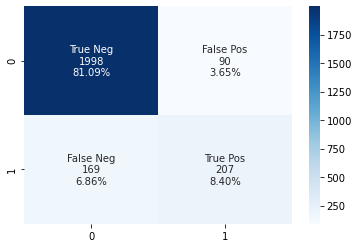

In [25]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')